In [122]:
# Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Introduction

The COVID-19 pandemic is considered as the most crucial global health calamity of the century and is the greatest challenge that the humankind faced since the 2nd World War. In December 2019, a new infectious respiratory disease emerged in Wuhan, Hubei province, China and was named by the World Health Organization as COVID-19 (coronavirus disease 2019). 
A new class of corona virus, known as SARS-CoV-2 (severe acute respiratory syndrome coronavirus 2) has been found to be responsible for occurrence of this disease. As far as the history of human civilization is concerned there are instances of severe outbreaks of diseases caused by a number of viruses. According to the report of the World Health Organization (WHO as of december 2020), the current outbreak of COVID-19, has affected over 68000000 people and killed more than 1565879 people in more than 200 countries throughout the world. Till now there is no report of any clinically approved antiviral drugs or vaccines that are effective against COVID-19 and are under trails, but there has been good strides made in the development of the vaccine and there could be possible vaccines ready to distributed on mass scale.

It has rapidly spread around the world, posing enormous health, economic, environmental and social challenges to the entire human population. The coronavirus outbreak is severely disrupting the global economy. Almost all the nations are struggling to slow down the transmission of the disease by testing & treating patients, quarantining suspected persons through contact tracing, restricting large gatherings, maintaining complete or partial lock down etc. 
 

# Abstract

Motivation:

Since December 2019, the infectious coronavirus disease 2019 (COVID-19) quickly swept the world and reached pandemic status in just a few months. Till now over 68 million cases have been reported worldwide,To cope with the pandemic, public health policies were implemented to slow the spread of COVID-19 by ‘flattening the curve’ using ‘stay-at-home’ policies. So to check the effectiveness of the mobility curtails put in place across the world to cope with the pandemic, I decided to study the deaths with respect to cases over the period of time.

Problem Statement:

The objective of the project is to analyze the impacts of various restrictive measures taken by goverments around the world to control the mobility of people, in order to check the rising numbers of cases and resulting deaths due to Covid-19 on economy and unemployments. I used the currency exchange rates data of euro with respect to other currencies to see the imapat of these restrictive measures on economy and subsequently checked the change in unemployments rates during this time. I developed model to predict death deaths casued by covid based on rising cases. 

In [3]:
#Loading the data using pandas read_csv() function.
df = pd.read_csv("/home/abhishek/Desktop/Python/Project/data/daily-cases-by-country.csv")
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,17/10/2020,17,10,2020,47,4,Afghanistan,AF,AFG,38041757.0,Asia,2.058265
1,16/10/2020,16,10,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.947860
2,15/10/2020,15,10,2020,32,1,Afghanistan,AF,AFG,38041757.0,Asia,1.992547
3,14/10/2020,14,10,2020,66,0,Afghanistan,AF,AFG,38041757.0,Asia,1.945231
4,13/10/2020,13,10,2020,129,3,Afghanistan,AF,AFG,38041757.0,Asia,1.811168
...,...,...,...,...,...,...,...,...,...,...,...,...
49567,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
49568,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
49569,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
49570,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


Reading of data using read csv and then exploring the data using data visualizations

In [5]:
#columns in the data
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

## Info about the data

-Categorical variables in the datasetr : dateRep, countriesAndTerritories, geoId, countryterritoryCode, continentExp

-Nuemrical Variable in the dataset : day, month, year, cases, deaths, popData2019, Cumulative_number_for_14_days_of_COVID-19_cases_per_100000

In [6]:
#info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49572 entries, 0 to 49571
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     49572 non-null  object 
 1   day                                                         49572 non-null  int64  
 2   month                                                       49572 non-null  int64  
 3   year                                                        49572 non-null  int64  
 4   cases                                                       49572 non-null  int64  
 5   deaths                                                      49572 non-null  int64  
 6   countriesAndTerritories                                     49572 non-null  object 
 7   geoId                                                       49355 non-null  object 
 

Shape of the dataset there are 49572 observations and 12 features in the dataset

In [7]:
df.shape

(49572, 12)

In [8]:
#correlation among the attributes/features
df.corr()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
day,1.000000,-0.124890,-0.064404,-0.003316,-0.003612,-0.003360,-0.013074
month,-0.124890,1.000000,-0.088934,0.100508,0.043111,-0.058678,0.231499
year,-0.064404,-0.088934,1.000000,0.006196,0.006515,-0.010713,NaN
cases,-0.003316,0.100508,0.006196,1.000000,0.736097,0.371817,0.202506
deaths,-0.003612,0.043111,0.006515,0.736097,1.000000,0.269054,0.172272
popData2019,-0.003360,-0.058678,-0.010713,0.371817,0.269054,1.000000,-0.038866
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,-0.013074,0.231499,NaN,0.202506,0.172272,-0.038866,1.000000


In [9]:
#description of the dataset
df.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,49572.000000,49572.000000,49572.000000,49572.000000,49572.000000,4.950800e+04,46789.000000
mean,15.604353,6.089950,2019.998648,794.804164,22.297930,4.213885e+07,38.733565
std,8.794332,2.444774,0.036739,4716.706882,125.915692,1.560342e+08,87.715643
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,4.000000,2020.000000,0.000000,0.000000,1.355982e+06,0.479981
50%,15.000000,6.000000,2020.000000,11.000000,0.000000,8.082359e+06,5.211319
75%,23.000000,8.000000,2020.000000,178.000000,3.000000,2.860872e+07,33.747586
max,31.000000,12.000000,2020.000000,97894.000000,4928.000000,1.433784e+09,1717.791411


## Cumulative 14 days cases count, cases, and deaths on each day.

-2783 No of days for which cumulative 14 days cases where not zero

-No. of days for which zero Cumulative 14 days cases count where reported is zero.

-No. of days for which zero Cumulative 14 days death counts where reported is zero.

In [10]:
#Data cleaning- Checking whether there are any null values
df.isnull()

# These seems to to genuing readings in the data set so removing it from the dataset may alter the analysis. So keeping it as it is.
print(df["Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"].isnull().value_counts()) #2783 No of days for which no cumulative 14 days cases where zero.
print(df["cases"].isnull().value_counts()) # No. of days for which zero cases where reported is zero.
print(df["deaths"].isnull().value_counts()) # No. of days for which zero deaths where reported is zero.

False    46789
True      2783
Name: Cumulative_number_for_14_days_of_COVID-19_cases_per_100000, dtype: int64
False    49572
Name: cases, dtype: int64
False    49572
Name: deaths, dtype: int64


In [11]:
#visuluaisation of data

import seaborn as sns
#sns.set_style('darkgrid')

In [107]:
#Columns that are available in dataset
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

In [109]:
# Function takes in input the feature/column name.
# Plots the feature counts with respect to days and months

def plots_days_months(x):
    
    plt.figure(figsize = (30,20))
    feature = ['day','month']
    list(enumerate(feature)) 
    
    for i in list(enumerate(feature)):
        plt.subplot(2, 2, i[0]+1)
        sns.barplot(x = i[1],y = x,  data = df)
        plt.xlabel(str(i[1]), fontsize=30)
        plt.ylabel(x,fontsize=30)
        plt.title("reported "+ x + " counts for each " + str(i[1]), size = 30)
    

- Day wise and month wise analysis of cases counts
- From the plots of cases we can say,reported cases increased quite rapidly from January, and was maximum july to september of 2020.
- Whereas reported cases were approximately equal on each day the months.

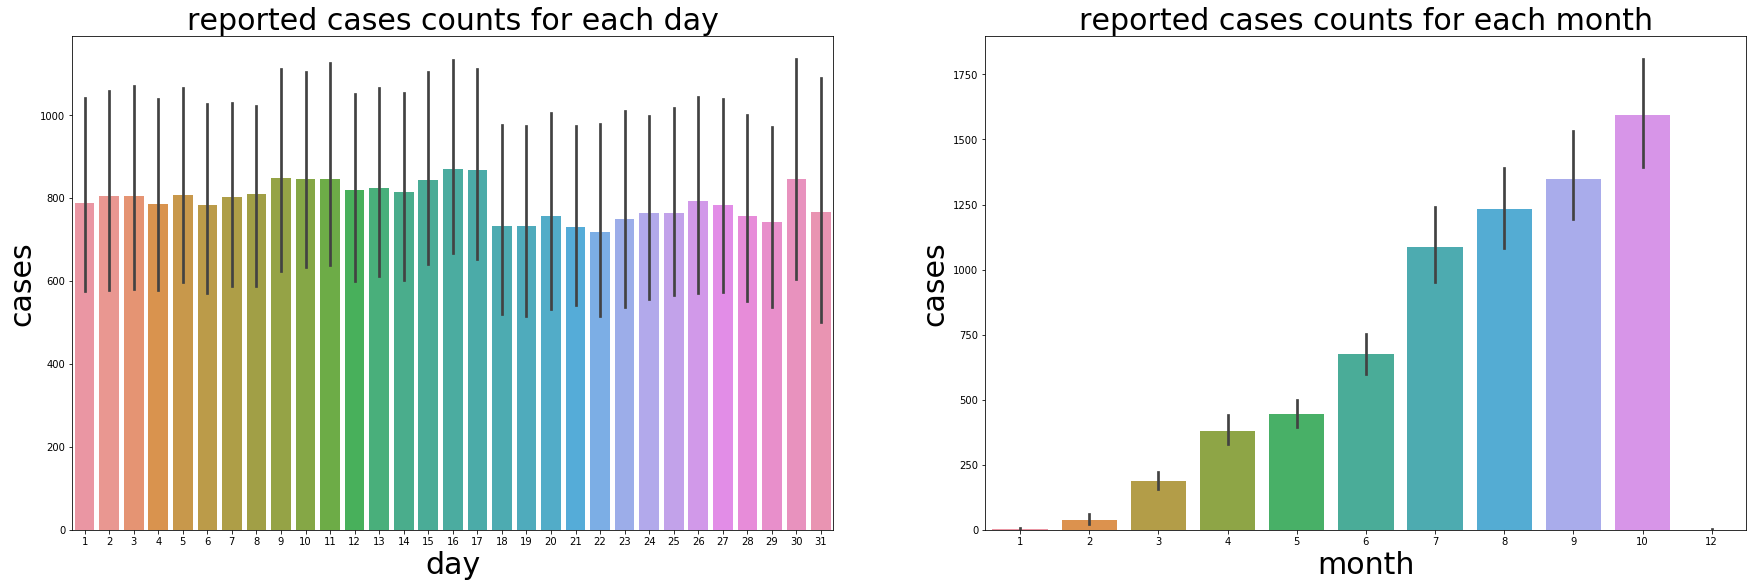

In [111]:
# Day wise and month wise analysis of reported cases counts

plots_days_months("cases") 

- Reported deaths increased for intial few months, but has been under control since July as seen from the plots.
- Reported deaths cases are aslo roughly equal for each days of the month with slight variation.

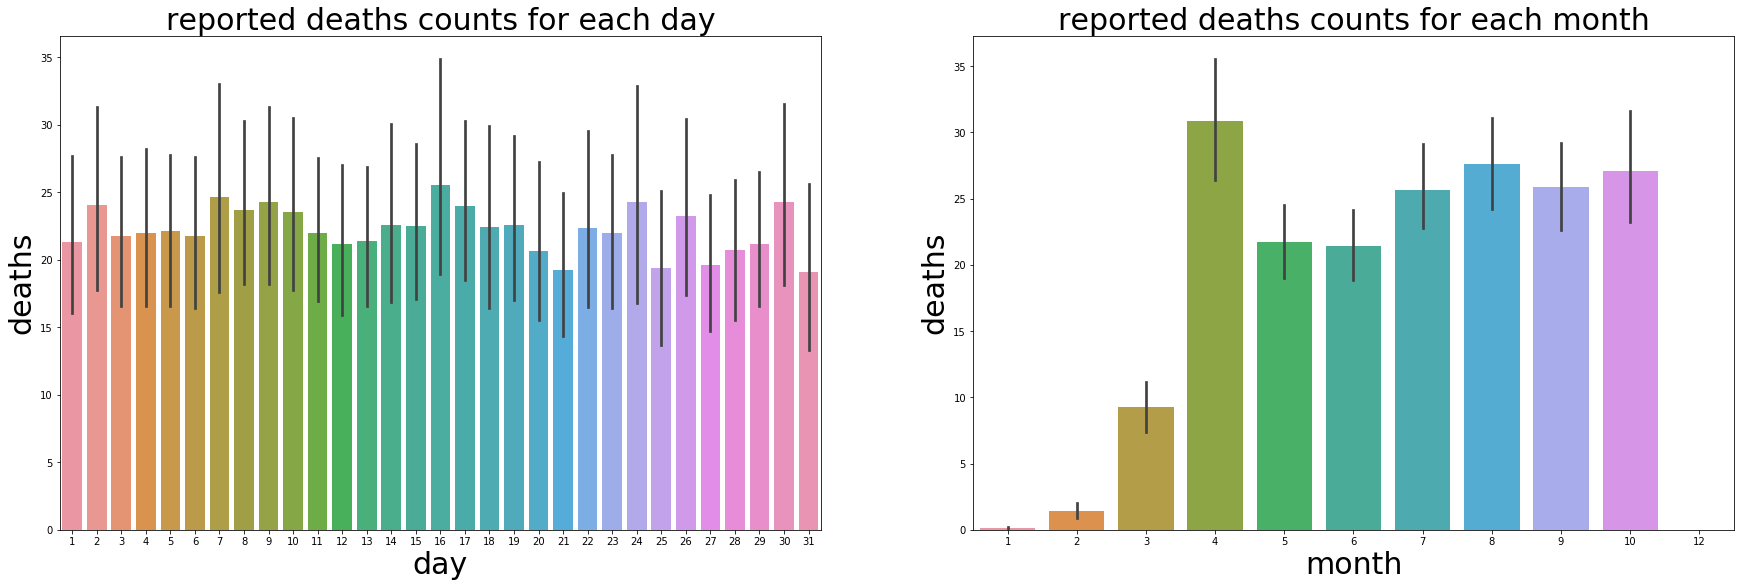

In [113]:
# Day wise and month wise analysis of cases counts

plots_days_months("deaths")

In [15]:
import numpy as np # importing numpy package

Total cases reported till october 2010 throughout the world was around 39400032.

In [16]:
df['cases'].sum() 

39400032

[0, 100000, 0, 100]

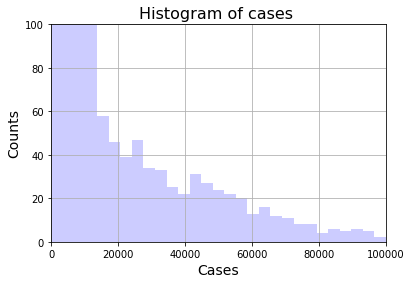

In [114]:
#Histogram to visualise cases and their distribution

df['cases'].hist(bins = np.linspace(0, 100000, 30), color = 'b', alpha = 0.2)
plt.xlabel('Cases', fontsize = 14)
plt.ylabel('Counts', fontsize =14)
plt.title("Histogram of cases ", fontsize = 16)
plt.axis([0,100000, 0, 100])

- For majority of days, per day deaths reported was 500 and below.
- For most number of days around 50% of days, new cases reported were above 40000 per day.
- Average number of deaths reported per day around the world was about 795 and average number of deaths reported was 23

In [18]:
df[['deaths', 'cases']].mean(axis = 0, skipna = True) 

deaths     22.297930
cases     794.804164
dtype: float64

- Total deaths reported till october 2010 from all over the world was around 1105353

In [19]:
df['deaths'].sum() 

1105353

[0, 2500, 0, 500]

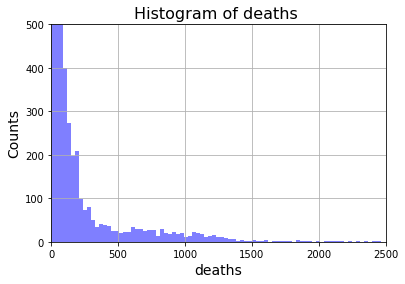

In [20]:
#Histogram to visualise deaths and their distribution

df['deaths'].hist(bins = list(range(0,2500, 30)), color = 'b', alpha = 0.5)
plt.xlabel('deaths', fontsize = 14)
plt.ylabel('Counts', fontsize =14)
plt.title("Histogram of deaths ", fontsize = 16)
plt.axis([0,2500, 0, 500])


[Timestamp('2020-03-21 00:00:00'), Timestamp('2020-10-17 00:00:00'), 0, 100000]

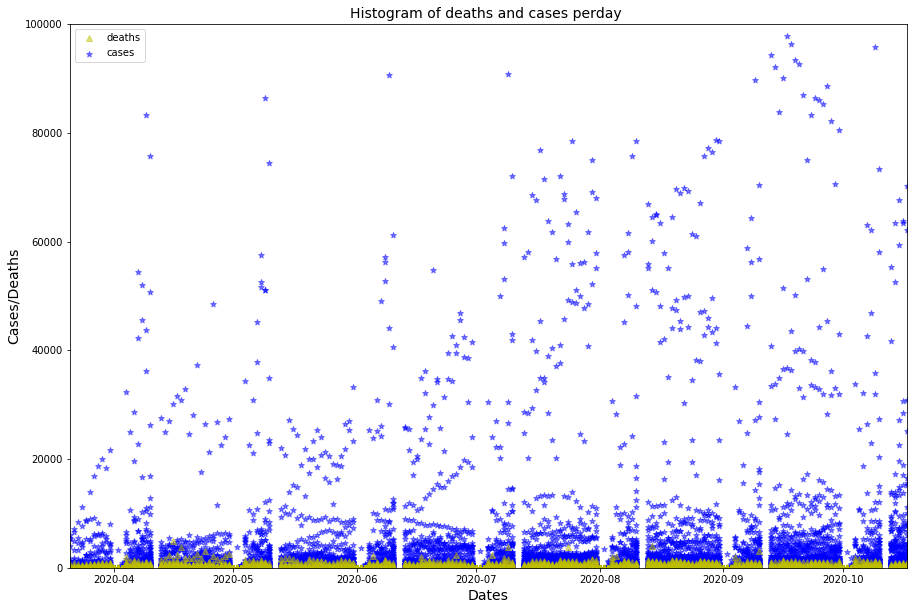

In [313]:
# Visualizing deaths and cases with respect to each day

# convereted date column into datetime format for plotting
date = pd.to_datetime(df['dateRep']) 

plt.figure(figsize =(15,10)) 
plt.scatter(date, df.cases, color = "b",alpha =0.5, marker = "*",label = 'cases')
plt.plot(date, df.deaths, color = "y",linestyle = "None",alpha = 0.5, marker = "^", label = 'deaths')
plt.xlabel('Dates', fontsize = 14)
plt.ylabel('Cases/Deaths', fontsize =14)
plt.title("Histogram of deaths and cases perday ", fontsize = 14)
plt.legend()
plt.axis([date.iloc[-1],date.iloc[0], 0, 100000])

## Regression to visualise cases and deaths an how they are distributed

-I can see from the plot that as cases increased the number of deaths increased as well.

-Showing a positive linear corelation between the two features.

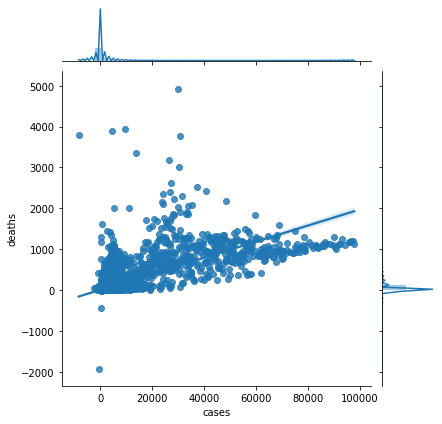

In [22]:
#Regression to visualise cases and deaths an how they are distributed
sns.jointplot(x='cases' , y='deaths' , data=df, kind='reg')

# Analysis of unemployment year wise 

- Importing unemployment data and converting it into a dataframe
- Removed all columns between column name '1960' to '1990' as they are empty columns and no reported data by each county for these years in the data and also removed two columns "Indicator Name" and "Indicator Code" as they were not required for analysis.

In [589]:
# Datafrmae uemp created
unemp = pd.read_csv("/home/abhishek/Desktop/Python/Project/data/unemployment_by_country_by_year.csv",
                    index_col= "Country Name", skiprows = [0,1,2,3])
unemp = unemp.drop(unemp.loc[:, 'Indicator Name':'1990'].columns, axis = 1)

In [590]:
unemp.head(5)

,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,11.218000,11.293000,11.442000,11.470000,11.477000,11.499000,11.480,11.472000,11.547,...,11.488,11.508,11.534,11.448,11.387,11.313,11.184,11.057,11.118,11.164
Angola,AGO,3.708000,3.740000,3.804000,3.816000,3.819000,3.829000,3.821,3.818000,3.850,...,7.362,7.379,7.400,7.331,7.282,7.223,7.119,7.019,6.886,6.774
Albania,ALB,16.190001,16.285999,16.478001,16.511999,16.521999,16.549999,16.525,16.516001,16.611,...,13.481,13.376,15.866,17.490,17.080,15.220,13.750,12.340,12.331,12.813
Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Checking basic summary stats for each country from years 1991 to 2020

In [133]:
unemp.describe() 

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,...,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,7.131789,7.404080,7.930205,8.128171,8.235069,8.353430,8.256941,8.297985,8.446608,8.306374,...,7.881343,7.900904,7.936993,7.752141,7.643716,7.526826,7.241587,6.953768,6.922998,6.934587
std,5.999861,6.096371,6.206683,6.149871,6.177167,6.150115,6.022867,5.926033,5.914674,5.962498,...,5.471353,5.595397,5.635179,5.495898,5.380547,5.208816,5.030343,4.898098,4.864850,4.829946
min,0.300000,0.347000,0.408000,0.457000,0.506000,0.560000,0.602000,0.621000,0.633000,0.628000,...,0.317000,0.384000,0.280000,0.200000,0.170000,0.150000,0.140000,0.110000,0.091000,0.082000
25%,2.755000,3.096000,3.654000,3.756000,3.819000,3.920000,3.910000,4.008005,4.219000,3.953000,...,4.293000,4.078713,4.241000,4.168305,4.311000,4.242000,4.098000,3.852769,3.889744,3.897888
50%,5.407000,5.555000,6.030000,6.503583,6.700000,6.908000,6.857000,6.888000,6.717000,6.535273,...,6.447000,6.397741,6.265000,6.110000,6.054000,6.140834,5.760000,5.520633,5.527787,5.552639
75%,9.579000,9.937525,10.719000,10.930000,10.680000,11.341000,10.964000,11.320000,11.793000,11.517000,...,10.139000,10.226814,10.271000,10.077612,9.912000,9.720000,9.316000,9.027000,8.801000,8.934000
max,37.424999,37.573002,37.862000,37.916000,37.931999,37.976002,37.939999,37.001999,36.226002,35.268002,...,31.377001,31.016001,28.996000,28.030001,27.694000,26.551001,27.070999,26.920000,28.181000,28.476999


# Function to plot the employment rate with respect to country from 1991 to 2020


In [309]:

# This function is to plot the unemployment rate 
# from years 1991 to 2020 for the countries passed.

def plot_unemp_region(country):
    for c in country:
        plt.plot(unemp.loc[c][1:],label = c)
        plt.xlabel('Year', fontsize = 12)
        plt.ylabel('Unemployment rate', fontsize = 12)
        plt.xticks(rotation=90)
        plt.title('Unemployment rate year for different regions', fontsize = 14)
        plt.legend(loc=1, prop={'size': 7})

# Unemployment rate of Ireland Vs European Nation in total

- Looking at the plot below I can say Ireland was handing the unemployment rate much better than EU in periods of 1997 to 2008.
- Ireland perfomed better in controlling the unemployement rate from 2015 onwards and due to that is better in handling unemployemnts rates during thin ongoing pndemic in 2020.
- But still there is an upward movememt in the unemployment trends from 2019 Ireland, which should be taken care to avoid any further damage.

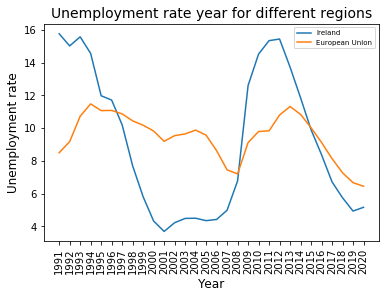

In [310]:
plot_unemp_region(["Ireland", "European Union"])

# Unemployment rate among different nations and regions

- Ireland seems to be in between EU and USA in total during pandemic in handling the unemployment rate and India follow closely with Ireland during this period.
- As per the data USA has least unemployment rate among these nations during last one year.

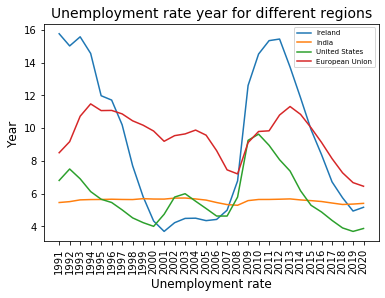

In [139]:
country = ["Ireland","United_Kingdom", "India","United States", "European Union"]
plot_unemp_region(country)

In [587]:
# Datafrmae for euro exchange rates with other currencies
cur = pd.read_csv("/home/abhishek/Desktop/Python/Project/data/euro-exchange-rates.csv",
                  skiprows = [0], index_col = "Date")

In [588]:
cur.head()

,USD,JPY,BGN,CZK,DKK,EEK,ILS,GBP,HUF,LTL,...,IDR,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR
Date,,,,,,,,,,,,,,,,,,,,,
02-Jan-20,1.1193,121.75,1.9558,25.411,7.4719,NaN,3.8690,0.84828,329.98,NaN,...,15540.92,79.9065,1298.24,21.1383,4.5764,1.6718,56.825,1.5084,33.741,15.7496
03-Jan-20,1.1147,120.54,1.9558,25.360,7.4731,NaN,3.8766,0.85115,330.53,NaN,...,15536.69,80.0085,1300.32,21.1433,4.5725,1.6718,56.983,1.5047,33.614,15.9222
06-Jan-20,1.1194,121.02,1.9558,25.301,7.4732,NaN,3.8913,0.85215,329.66,NaN,...,15604.44,80.5175,1308.83,21.1418,4.5940,1.6788,57.247,1.5110,33.744,15.9465
07-Jan-20,1.1172,121.15,1.9558,25.276,7.4731,NaN,3.8731,0.85183,331.28,NaN,...,15501.15,80.2650,1302.48,21.0852,4.5727,1.6833,56.832,1.5081,33.823,15.9724
08-Jan-20,1.1115,120.86,1.9558,25.265,7.4731,NaN,3.8541,0.84868,331.08,NaN,...,15441.51,79.7090,1297.37,20.9079,4.5588,1.6739,56.420,1.5014,33.740,15.8166


# Function to show EURO fluctuations with respect to other major currencies

- Take input the list of currencies with which the Euro rates are to be compared
- Plots the Fluctuations of an individual currency with respect to EURO from period of January 2020 to october 2020
- From the plots it is visible that EURO valuations with respect to major currencies like USD, JPY, CNY was weaked during last few months, this indicates the impact of businesses and organization not able to operate properly due to lockdown and restrictive movements laws implemted to control the virus spread. 
- The EURO valuation was most impacted with respect to Chinese currency CNY and least w.r.t Indian Currency INR.

In [297]:

def plot_currency_rate(currency):
    
    plt.figure(figsize = (30,20))
    for c in list(enumerate(currency)):
        plt.subplot(3, 2,c[0]+1)
        plt.plot(cur.loc[:][c[1]],label = c[1])
        plt.ylabel(c[1], fontsize = 12)
        plt.xlabel('From Jan to Oct', fontsize = 12)
        plt.title("Fluctations in Euro rate with "+ c[1], fontsize = 14)
        plt.legend(loc=1, prop={'size': 10})
        ax = plt.gca() # To hide the Xtick values
        ax.axes.xaxis.set_ticks([])
        

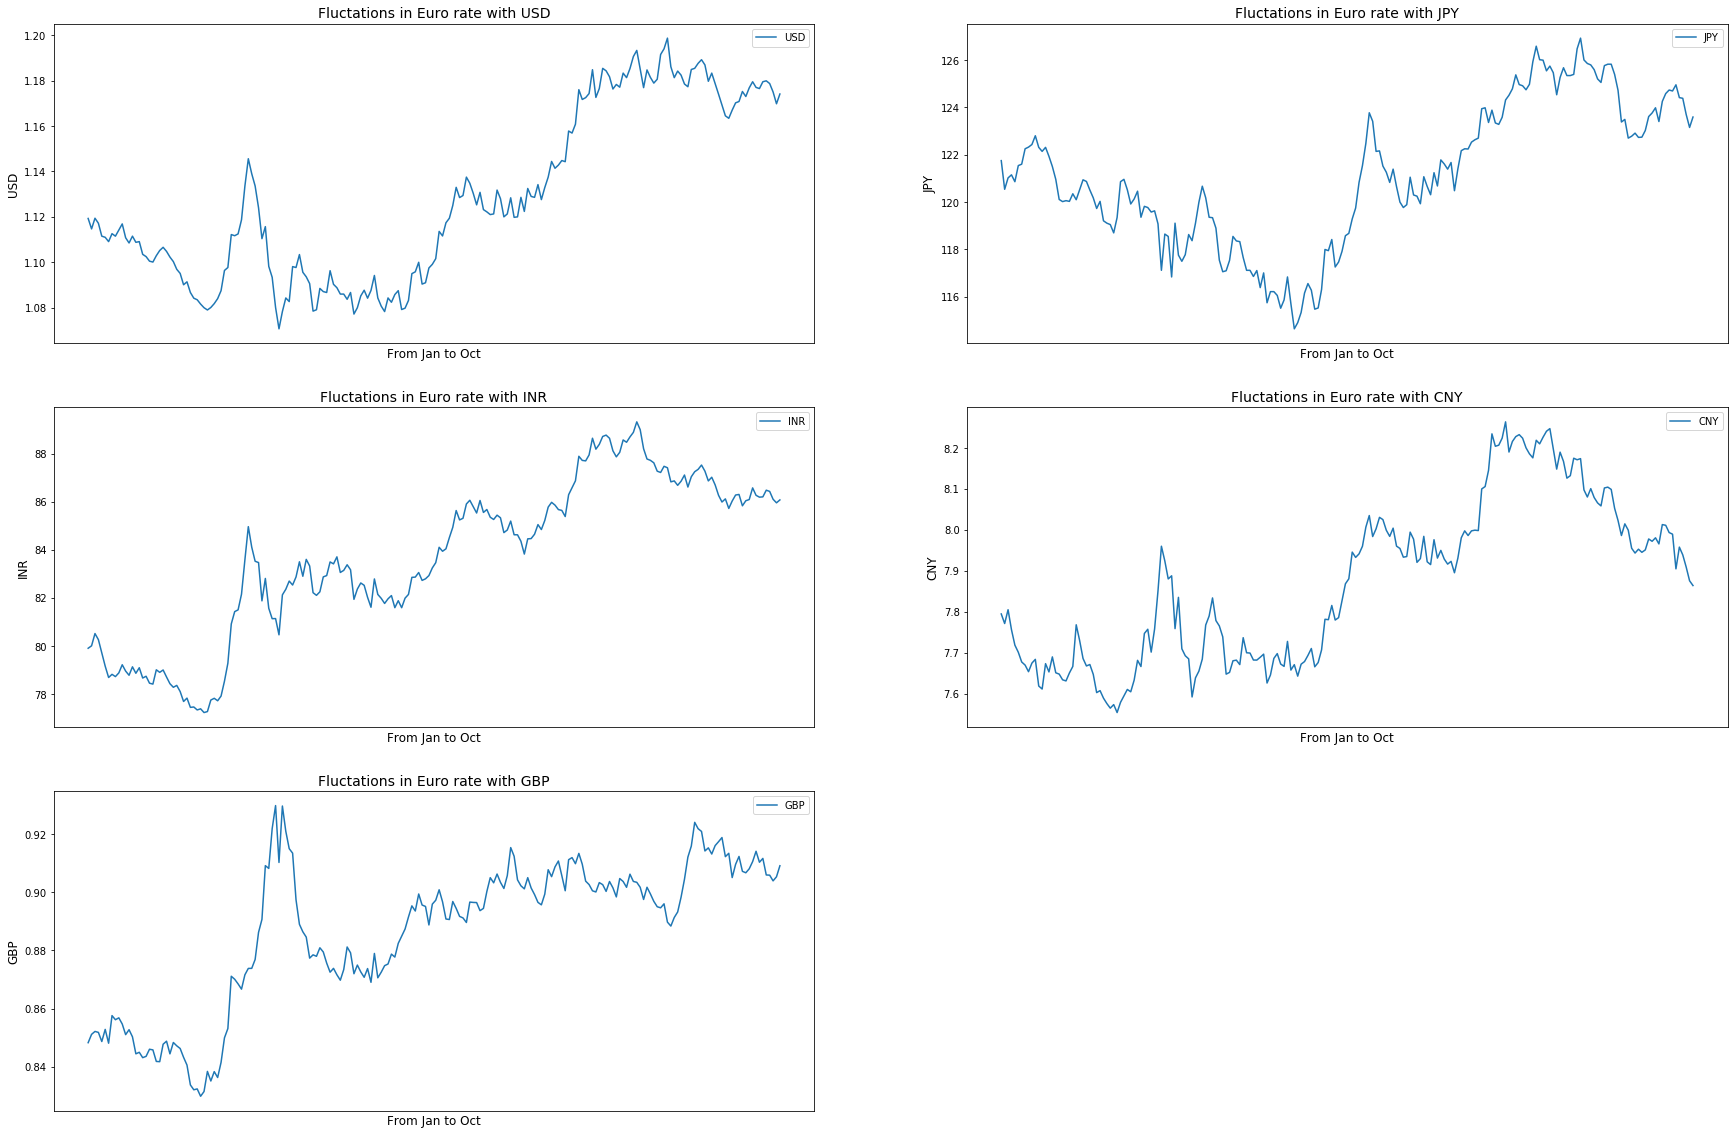

In [303]:
#Comaparing following currency with Euro
currency = ["USD", "JPY", "INR", "CNY", "GBP"]    
# Individual plots by calling plot function.
plot_currency_rate(currency) 


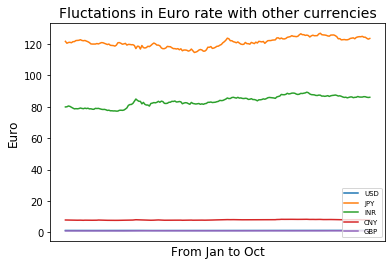

In [302]:
# Currency fluctuation with EURO on same plots for major curriencies.
for c in currency:
                    plt.plot(cur.loc[:][c],label = c)
                    plt.ylabel("Euro", fontsize = 12)
                    plt.xlabel('From Jan to Oct', fontsize = 12)
                    plt.title("Fluctations in Euro rate with other currencies" ,fontsize = 14)
                    plt.legend(loc=4, prop={'size': 7})
                    ax = plt.gca() # To hide the Xtick values
                    ax.axes.xaxis.set_ticks([])

# Model Development to predict deaths based on cases per day

[]

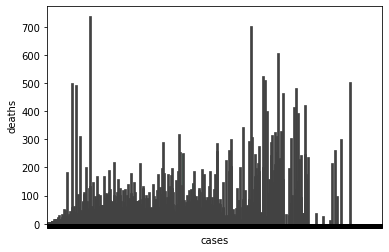

In [247]:
#bar plot between cases and deaths with a standard estimator.
sns.barplot(data=df, x= 'cases' , y = 'deaths' , estimator=np.std)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([]) # To hide the xticks 

#From the correlation matrix plot in the following code, I can see death and cases has high correlation of 0.736 and rest variables has very weak correaltion between them.

In [314]:
#Correlation among the attributes in the dataset
df.corr()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
day,1.000000,-0.124890,-0.064404,-0.003316,-0.003612,-0.003360,-0.013074
month,-0.124890,1.000000,-0.088934,0.100508,0.043111,-0.058678,0.231499
year,-0.064404,-0.088934,1.000000,0.006196,0.006515,-0.010713,NaN
cases,-0.003316,0.100508,0.006196,1.000000,0.736097,0.371817,0.202506
deaths,-0.003612,0.043111,0.006515,0.736097,1.000000,0.269054,0.172272
popData2019,-0.003360,-0.058678,-0.010713,0.371817,0.269054,1.000000,-0.038866
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,-0.013074,0.231499,NaN,0.202506,0.172272,-0.038866,1.000000


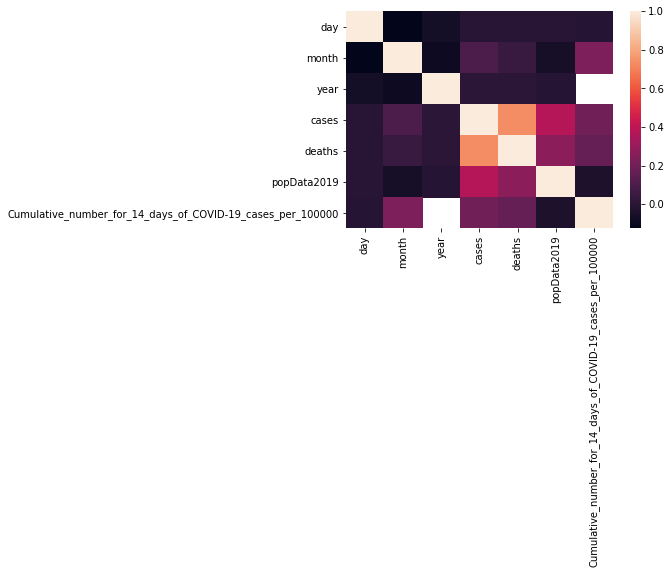

In [315]:
#Visualizing corr values
sns.heatmap(df.corr())

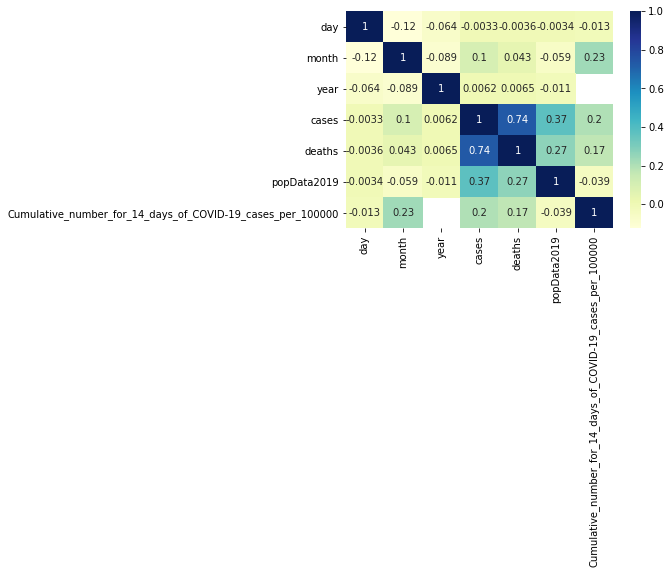

In [316]:
sns.heatmap(df.corr(),annot=True , cmap='YlGnBu')

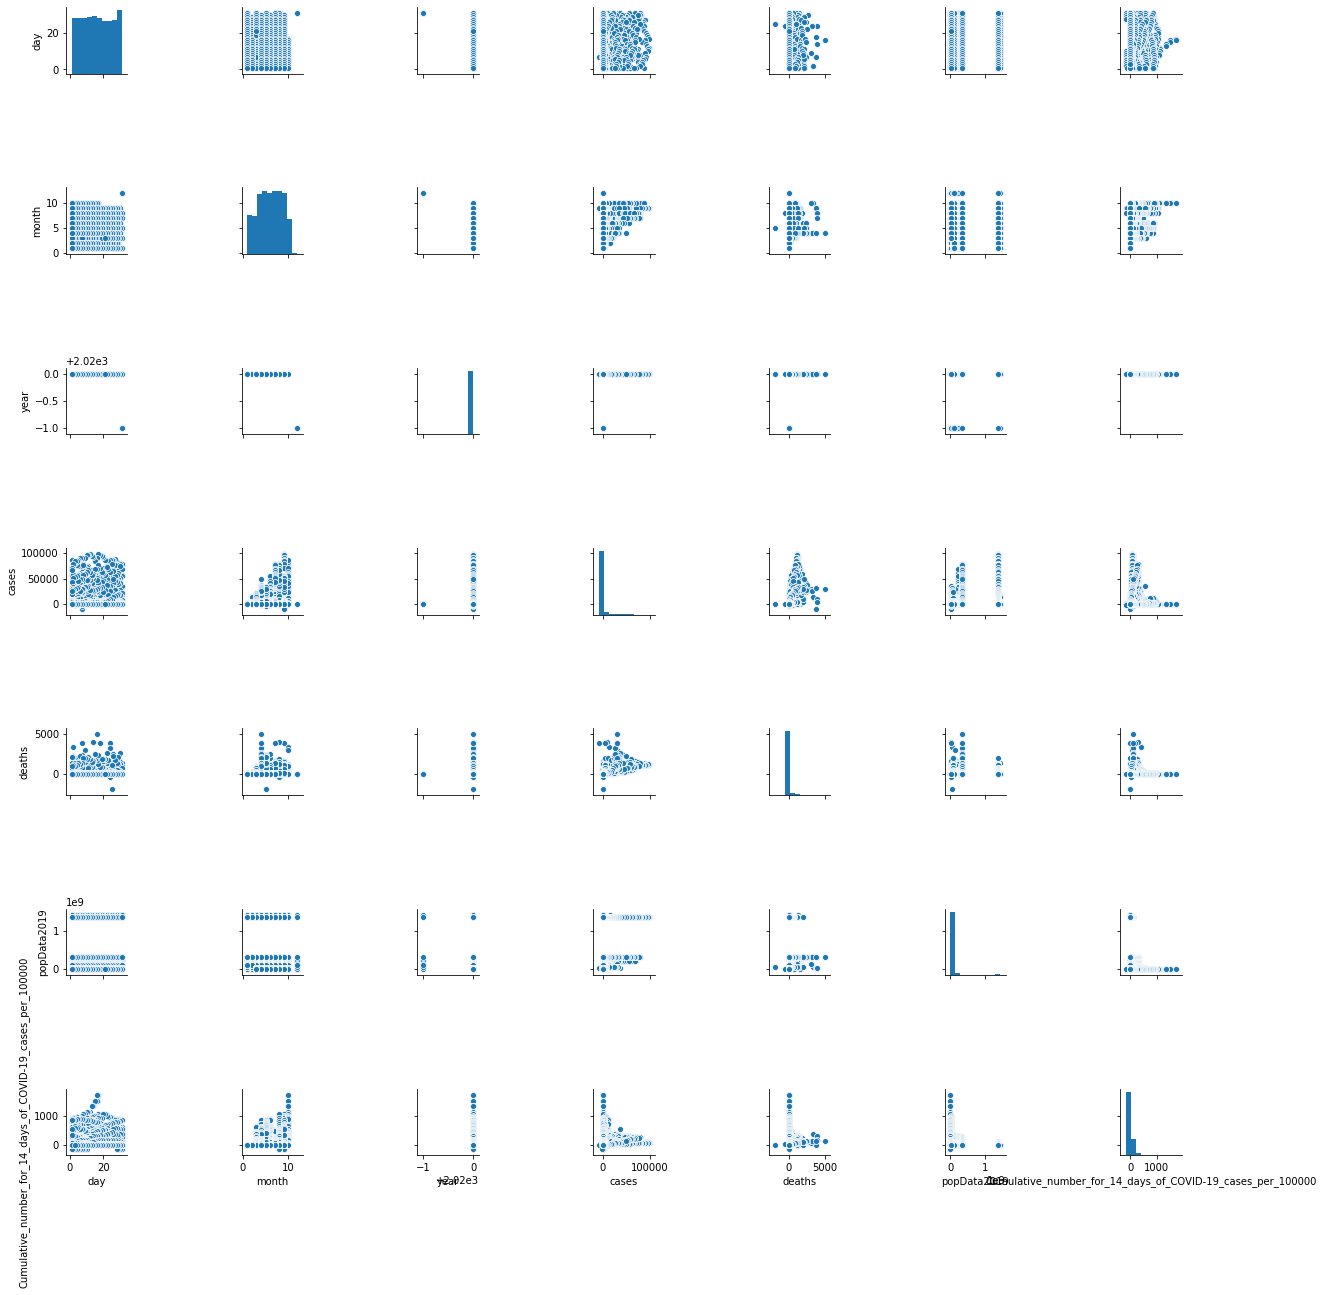

In [317]:
#pair plots to observe the distribution of attributes 
sns.pairplot(df)
#plt.tight_layout()

- By observing the distribution of data through visualisations, it is clear that the increase of the cases has increased the number of deaths. So as the objective to predict the number of death based on the number of cases day wise across the country Linear regression is used to complete the process and the reulsts are as follows.

In [516]:
# Used to split arrays or matrices into random train and test subsets

from sklearn.model_selection import train_test_split 

Independet variable - cases, and dependent variable deaths takes as X and y respectively.

In [517]:
X,y = df[['cases']] , df['deaths']

- X is the dataframe with one column containing entries of "cases" and y is a series containg target/response variable "deaths"

In [518]:
X.head(5)

,cases
0,47
1,0
2,32
3,66
4,129


In [519]:
y.head(5)

0    4
1    0
2    1
3    0
4    3
Name: deaths, dtype: int64

- Data is partioned into test and training dataset with 80:20 split up using train_test_split()
- test_size argument of 0.2 in train_test_split() is to include 20% of data for test set.

In [564]:
# Train and test sets
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

In [565]:
#Defined a linear regression model

from sklearn import linear_model
regr = linear_model.LinearRegression()

#Modele is trained with the train data formulated

regr.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Regression Coeffiecients

- Regression coefficients are estimates of the unknown population parameters that is the relationship between a cases which is a predictor  variable and the death which is the repsonse variable.
- regression coefficient , beta0 was found to be 0.0196, this suggests that on average when no case were reported the deaths counts were 0.0196.
- Intercept coefficient of 6.759 suggets that with a unit increase in cases per day, death count rises by 6.759. i,e for example for each 100 new cases number of deaths increase by 7.5 per day.


In [566]:
# Regression coefficient
regr.coef_

array([0.01967963])

In [567]:
#The expected mean value of death when all the cases confirmed is 0
regr.intercept_

6.759801410998795

In [568]:
#columns in X that is independent data or the predictor

X_train.columns

Index(['cases'], dtype='object')

In [569]:
#regression coefficent in this equation
cf = pd.DataFrame(regr.coef_ , X_train.columns , columns=['Coeff'])

In [570]:
cf

,Coeff
cases,0.01968


- prediction made on deaths by passsing the counts test data to the linear model

In [571]:
#predicting based on the test data
y_pre = regr.predict(X_test)
y_pre

array([27.65957216,  6.79916068,  6.75980141, ...,  6.75980141,
        6.79916068,  6.75980141])

In [572]:
# actual deaths corresponding to cases count on each day
y_test.head(10)

46907    5
1516     0
278      0
45457    0
6245     0
6        0
40218    0
21405    0
42299    0
35197    0
Name: deaths, dtype: int64

In [573]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,17/10/2020,17,10,2020,47,4,Afghanistan,AF,AFG,38041757.0,Asia,2.058265
1,16/10/2020,16,10,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.947860
2,15/10/2020,15,10,2020,32,1,Afghanistan,AF,AFG,38041757.0,Asia,1.992547
3,14/10/2020,14,10,2020,66,0,Afghanistan,AF,AFG,38041757.0,Asia,1.945231
4,13/10/2020,13,10,2020,129,3,Afghanistan,AF,AFG,38041757.0,Asia,1.811168


In [574]:
#reshaping X to calculate the metrics
X.values.reshape

<function ndarray.reshape>

In [575]:
from sklearn.metrics import mean_squared_error,r2_score , mean_absolute_error

## Mean Absolute Error
- Mean Absolute Error (MAE) is another loss function used for regression models. 
- MAE is the sum of absolute differences between our target and predicted variables. 
- As we have actual value as y_test and the pedicted value to y_pre the dfference is observed

In [576]:
#MAE
mean_absolute_error(y_test , y_pre)

18.312803925039173

## R-Squared
- R-squared is a statistical measure of how close the data are to the fitted regression line.
- Gives an indication about how well the predictor variable "cases" are explain about the response variable death in our model
- My model with predictor variable cases is able explain 61% of variations in response variable death.

In [577]:
#r-score
r2_score(y_test , y_pre)

0.6156843561102672

Scatter plot for the linear regression line and how the data is distributed around the line is visualised

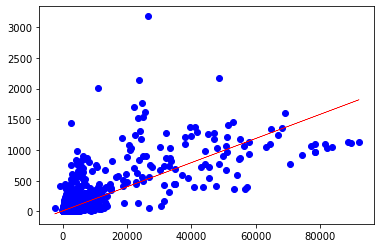

In [578]:

plt.scatter(X_test, y_test , color= 'blue' , linewidths=1)
plt.plot(X_test , y_pre , color='red' , linewidth=0.5)


In [579]:
g = regr.score(X_test , y_test)
g

0.6156843561102672

In [580]:
# building a random forest model.

In [581]:
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor

In [582]:
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0) 
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [583]:
Y_pred = rfr.predict(X_test)

In [584]:
rfr.score(X_test,y_test)

0.3935824935497033

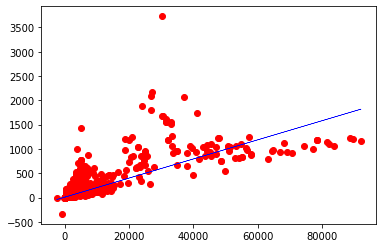

In [585]:
plt.scatter(X_test, Y_pred, color = 'red')
plt.plot(X_test , y_pre , color='blue' , linewidth=0.5)

# Conclusion

Overall during the exploratory data anaysis it was observed that with increase in covid case each day there was some rise in the deaths reported as well. From the results of the two regression models with cases as predictor and deaths per day as the target variable, Linear model was more accurate in predicting the death counts per day with respect to the number of cases reported each day.

Through data visualizations performed on datasets containing unemployment rate and euro exchange rates data, I was also able to explore the impacts of restrictive measures introduced in countries to restrict the spread of virus had on major European economy amd Unemployment.

Euro rate was seen to decline in last few months with respect to major currencies like USD, GBR, CNY etc. suggesting the impact lockdowns had on businesses and in return country economy. The impact on economy was clearly visible on the unemployment rate as well, unemployment data of Ireland with respect to other countries, Although Ireland was able to handle the unemployment better than the counterparts, there was clearly a rise in unemployment in last few months.


# References

1. https://www.sciencedirect.com/science/article/abs/pii/S0048969720323998
2. https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend
3. https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html
4. https://www.delftstack.com/howto/matplotlib/how-to-hide-axis-text-ticks-and-or-tick-labels-in-matplotlib/
